In [45]:
html_code ="""<div style="text-align: center; background-color: #f0f0f0; padding: 20px;">
    <h1 style="color: #333;">Housing_Price_Pred</h1>
</div>"""

HTML(html_code)

In [1]:
!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics 
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from IPython.display import HTML

In [3]:
train=pd.read_csv('california_housing.csv')

In [4]:
train.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

it is obvious that price will depend on Houe age, Average number of bedroooms and avergae number of rooms, latitude and longitude.

creating a new feature 'Avg_households'

In [6]:
train['Avg_households']=train['Population']/train['AveOccup']

In [7]:
train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,Avg_households
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526,126.0
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585,1138.0
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521,177.0
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413,219.0
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422,259.0
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,0.781,330.0
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,0.771,114.0
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,0.923,433.0
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,0.847,349.0


In [8]:
train['Avg_households'],train['target']=train['target'],train['Avg_households']

In [9]:
train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,Avg_households
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,126.0,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,1138.0,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,177.0,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,219.0,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,259.0,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,330.0,0.781
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,114.0,0.771
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,433.0,0.923
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,349.0,0.847


In [10]:
train.rename(columns={'target': 'Avg_households1'}, inplace=True)
train.rename(columns={'Avg_households': 'target'}, inplace=True)
train.rename(columns={'Avg_households1': 'Avg_households'}, inplace=True)


In [11]:
train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Avg_households,target
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,126.0,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,1138.0,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,177.0,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,219.0,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,259.0,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,330.0,0.781
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,114.0,0.771
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,433.0,0.923
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,349.0,0.847


In [12]:
#checking positive and negatvie correlation:
correlation=train.corr()

<Axes: >

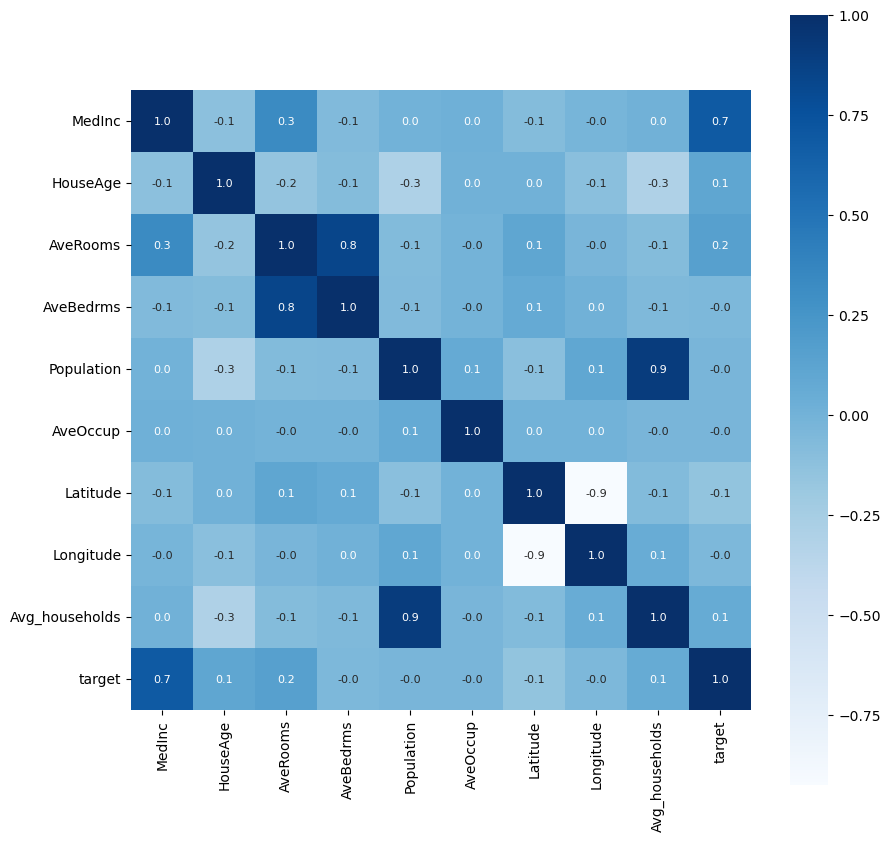

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True, fmt=".1f", annot=True, annot_kws={'size':8},cmap='Blues')

In [14]:
train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Avg_households,target
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,126.0,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,1138.0,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,177.0,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,219.0,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,259.0,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,330.0,0.781
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,114.0,0.771
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,433.0,0.923
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,349.0,0.847


In [15]:
train.drop(columns=['AveBedrms'],inplace=True) ##droppping AveBedrms as it doesn't have much relation with the target

In [16]:
train

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,Avg_households,target
0,8.3252,41,6.984127,322,2.555556,37.88,-122.23,126.0,4.526
1,8.3014,21,6.238137,2401,2.109842,37.86,-122.22,1138.0,3.585
2,7.2574,52,8.288136,496,2.802260,37.85,-122.24,177.0,3.521
3,5.6431,52,5.817352,558,2.547945,37.85,-122.25,219.0,3.413
4,3.8462,52,6.281853,565,2.181467,37.85,-122.25,259.0,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,845,2.560606,39.48,-121.09,330.0,0.781
20636,2.5568,18,6.114035,356,3.122807,39.49,-121.21,114.0,0.771
20637,1.7000,17,5.205543,1007,2.325635,39.43,-121.22,433.0,0.923
20638,1.8672,18,5.329513,741,2.123209,39.43,-121.32,349.0,0.847


In [17]:
X=train.iloc[:,:8].values
Y=train.iloc[:,8:].values

In [20]:
#splitting the data set:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)#no need to use stratify as not a classification problem and(20:80)

Linear Regression()

In [21]:
model=LinearRegression()

In [22]:
model.fit(X_train,Y_train)

LinearRegression()

In [23]:
Y_predict_train=model.predict(X_train)

In [24]:
Y_predict_train

array([[1.85995838],
       [2.89551807],
       [2.71187274],
       ...,
       [1.85763256],
       [2.72997518],
       [2.67541166]])

In [25]:
training_error=mean_squared_error(Y_train,Y_predict_train)#mean_squared_error

In [26]:
print(training_error) 

0.4848236600896156


In [27]:
Y_predict_test=model.predict(X_test)
test_error=mean_squared_error(Y_predict_test,Y_test)
print(test_error)

0.49701344301245737


In [28]:
r2_training=r2_score(Y_train,Y_predict_train)
print(r2_training)

0.63731929813501


In [29]:
r2_test=r2_score(Y_test,Y_predict_test)
print(r2_test)

0.62071883567247


XGBOOST

In [30]:
#use of XGBOOST regression model:
train

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,Avg_households,target
0,8.3252,41,6.984127,322,2.555556,37.88,-122.23,126.0,4.526
1,8.3014,21,6.238137,2401,2.109842,37.86,-122.22,1138.0,3.585
2,7.2574,52,8.288136,496,2.802260,37.85,-122.24,177.0,3.521
3,5.6431,52,5.817352,558,2.547945,37.85,-122.25,219.0,3.413
4,3.8462,52,6.281853,565,2.181467,37.85,-122.25,259.0,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,845,2.560606,39.48,-121.09,330.0,0.781
20636,2.5568,18,6.114035,356,3.122807,39.49,-121.21,114.0,0.771
20637,1.7000,17,5.205543,1007,2.325635,39.43,-121.22,433.0,0.923
20638,1.8672,18,5.329513,741,2.123209,39.43,-121.32,349.0,0.847


In [31]:
model=XGBRegressor()

In [32]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
Y_predict_train=model.predict(X_train)

In [34]:
Y_predict_train

array([1.2676615, 3.498909 , 1.8017586, ..., 2.0577223, 2.510041 ,
       3.1834226], dtype=float32)

In [35]:
Y_predict_test=model.predict(X_test)

In [36]:
Y_predict_test

array([0.60416114, 0.8334304 , 5.228064  , ..., 4.7934647 , 0.8356748 ,
       1.8124467 ], dtype=float32)

In [37]:
training_error1=mean_squared_error(Y_train,Y_predict_train)#mean_squared_error
print(training_error1)

0.07839722843069885


In [38]:
test_error1=mean_squared_error(Y_test,Y_predict_test)#mean_squared_error
print(test_error1)

0.21551697698871536


In [39]:
r2_training_1=r2_score(Y_train,Y_predict_train)
print(r2_training_1)

0.9413536009643998


In [40]:
r2_test_1=r2_score(Y_test,Y_predict_test)
print(r2_test_1)

0.8355345693082579


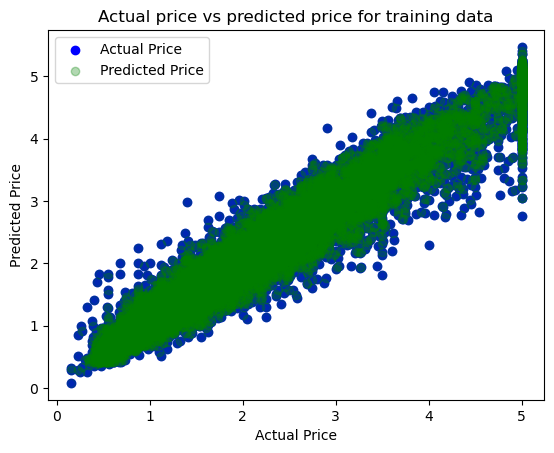

In [41]:
plt.scatter(Y_train, Y_predict_train, color='blue', label='Actual Price')  
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.scatter(Y_train, Y_predict_train, color='green', label='Predicted Price',alpha=0.3)  
plt.title("Actual price vs predicted price for training data")
plt.legend()
plt.show()

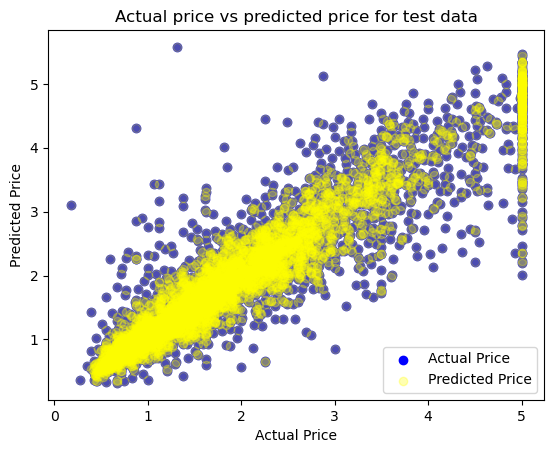

In [458]:
plt.scatter(Y_test, Y_predict_test, color='blue', label='Actual Price')  
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.scatter(Y_test, Y_predict_test, color='yellow', label='Predicted Price',alpha=0.3)  
plt.title("Actual price vs predicted price for test data")
plt.legend()
plt.show()